In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ner_dataset_motsunabe.csv")

In [5]:
# sentence_id 기준으로 문장별 input_ids, labels 리스트 만들기
grouped = df.groupby("sentence_id")
input_ids = grouped["token_id"].apply(list).tolist()
labels = grouped["tag"].apply(list).tolist()

# label → 숫자 인덱스로 변환
unique_labels = sorted(set(l for doc in labels for l in doc))
label2id = {l: i for i, l in enumerate(unique_labels)}
id2label = {i: l for l, i in label2id.items()}
labels_ids = [[label2id[l] for l in doc] for doc in labels]

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_label_statistics_from_df(df):
    # 토큰 단위 라벨 빈도
    token_counts = Counter(df['tag'])

    # 문장 단위 라벨 (문장 내 등장한 라벨 집합 기준)
    sentence_counts = df.groupby('sentence_id')['tag'].apply(lambda x: set(x)).explode()
    sentence_counts = Counter(sentence_counts)

    labels = list(token_counts.keys())
    token_values = [token_counts[l] for l in labels]
    sentence_values = [sentence_counts[l] for l in labels]

    # 비율 계산
    total_tokens = sum(token_values)
    token_ratios = [v / total_tokens * 100 for v in token_values]

    total_sentences = sum(sentence_values)
    sentence_ratios = [v / total_sentences * 100 for v in sentence_values]

    plt.figure(figsize=(14,10))

    # 공통 함수: 막대 위에 값 표시
    def annotate_bars(ax, values, fmt="{:.1f}", offset=0.5):
        for i, v in enumerate(values):
            ax.text(i, v + offset, fmt.format(v), ha='center', va='bottom', fontsize=9)

    # (1) 토큰 기준 빈도
    ax1 = plt.subplot(2,2,1)
    bars1 = ax1.bar(labels, token_values, color="skyblue")
    annotate_bars(ax1, token_values, fmt="{:.0f}")
    plt.xlabel("NER Labels")
    plt.ylabel("Token Count")
    plt.title("Token Count per Label")
    plt.xticks(rotation=45)

    # (2) 문장 기준 빈도
    ax2 = plt.subplot(2,2,2)
    bars2 = ax2.bar(labels, sentence_values, color="salmon")
    annotate_bars(ax2, sentence_values, fmt="{:.0f}")
    plt.xlabel("NER Labels")
    plt.ylabel("Sentence Count")
    plt.title("Sentence Count per Label")
    plt.xticks(rotation=45)

    # (3) 토큰 비율 (전체 라벨 기준)
    ax3 = plt.subplot(2,2,3)
    bars3 = ax3.bar(labels, token_ratios, color="lightgreen")
    annotate_bars(ax3, token_ratios, fmt="{:.2f}%")
    plt.xlabel("NER Labels")
    plt.ylabel("Ratio (%)")
    plt.title("Token Ratio per Label")
    plt.xticks(rotation=45)

    # (4) 'O' 태그 제외한 토큰 비율
    labels_no_o = [l for l in labels if l != 'O']
    token_ratios_no_o = [token_counts[l] / sum(token_counts[l] for l in labels_no_o) * 100 for l in labels_no_o]

    ax4 = plt.subplot(2,2,4)
    bars4 = ax4.bar(labels_no_o, token_ratios_no_o, color="orange")
    annotate_bars(ax4, token_ratios_no_o, fmt="{:.2f}%")
    plt.xlabel("NER Labels (excluding 'O')")
    plt.ylabel("Ratio (%)")
    plt.title("Token Ratio per Label (Excluding 'O')")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


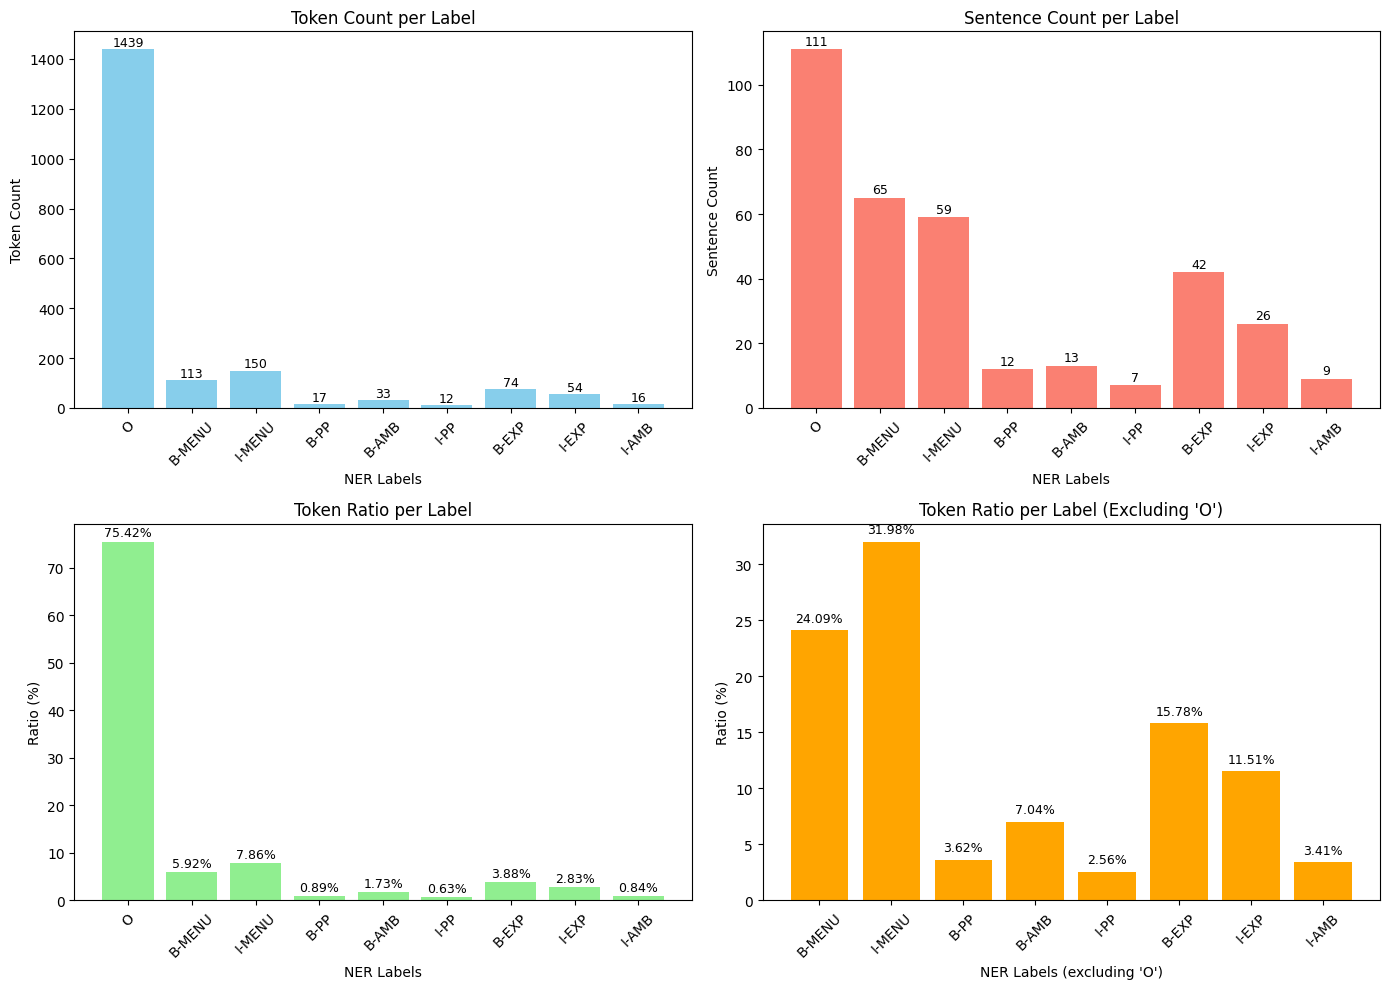

In [15]:
df_subset = df[df["sentence_id"] < 111]

plot_label_statistics_from_df(df_subset)